# i. Perkenalan
Nama : Dheny Ramadianindra\
Batch : FTDS-010\
Dataset : Telco Customer Churn\
Objective: 
- Able to understand the concept of Artificial Neural Network.
- Able to prepare the data for model in Artificial Neural Network.
- Able to implemented Artificial Neural Network with the data.
- Able to analyze and explained the layer.


# ii. Import Libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

Data can be accessed on https://www.kaggle.com/blastchar/telco-customer-churn

In [3]:
# Load Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Duplicate Dataset
data_ori = data.copy()
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Data consist of 7043 rows and 21 columns, with 1 target column name Churn (Customers who left within the last month).


In [4]:
# Precentage of Missing Value
(data.isnull().sum()/len(data))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There's no missing values on the dataset, so we can go through

# iv. Exploratory Data Analysis (EDA)


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


From the data describe we just get 3 feature, it means the rest of all data type is object/categorical.

In [8]:
# Look for numerical data
num = data.select_dtypes(include=np.number)
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

There's 3 numerical data

In [9]:
# Look for categorical data
cat = data.select_dtypes(include=['object'])
cat.nunique()


customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

There's 18 categorical data with each number of value in the columns, but TotalCharges is a numeric if we can see from the data, we're gonna fix this


In [10]:
# Look the value of categorical data except TotalCharges
category= ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']
for i in category:
  print('The value of',i,'=',(cat[i].unique()))


The value of gender = ['Female' 'Male']
The value of Partner = ['Yes' 'No']
The value of Dependents = ['No' 'Yes']
The value of PhoneService = ['No' 'Yes']
The value of MultipleLines = ['No phone service' 'No' 'Yes']
The value of InternetService = ['DSL' 'Fiber optic' 'No']
The value of OnlineSecurity = ['No' 'Yes' 'No internet service']
The value of OnlineBackup = ['Yes' 'No' 'No internet service']
The value of DeviceProtection = ['No' 'Yes' 'No internet service']
The value of TechSupport = ['No' 'Yes' 'No internet service']
The value of StreamingTV = ['No' 'Yes' 'No internet service']
The value of StreamingMovies = ['No' 'Yes' 'No internet service']
The value of Contract = ['Month-to-month' 'One year' 'Two year']
The value of PaperlessBilling = ['Yes' 'No']
The value of PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
The value of Churn = ['No' 'Yes']


In [11]:
# Fixing the TotalCharges
data[pd.to_numeric(data.TotalCharges,errors="coerce").isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There was a 11 blank value on our TotalCharges, drop them and make it to float

In [12]:
# Drop the blank value
data=data[data.TotalCharges!=' ']

# Change to float
data.TotalCharges=pd.to_numeric(data.TotalCharges)

# Look for numerical data
num = data.select_dtypes(include=np.number)
num.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

TotalCharges has change to float

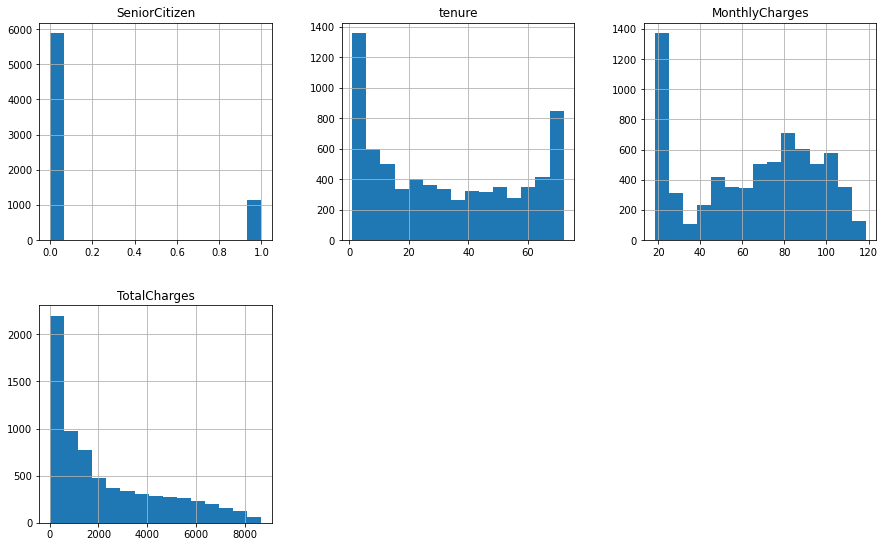

In [14]:
# Visualize the numeric
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
data[num_cols].hist(bins=15, figsize=(15, 30), layout=(6, 3));

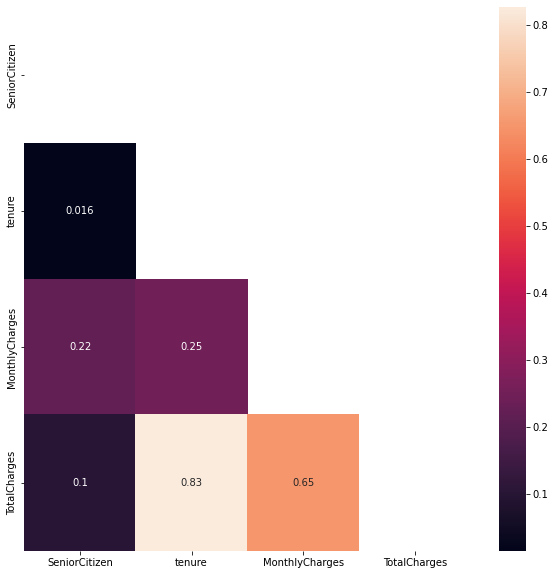

In [ ]:
# Plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

From the heatmap correlation, SeniorCitizen doesn't have any correlation with the other.

In [ ]:
# Make the definition of sountplot
def countplot(df):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Countplot
    plt.subplot(1, 2, 1)
    sns.countplot(df, hue='Churn', data=data)
    

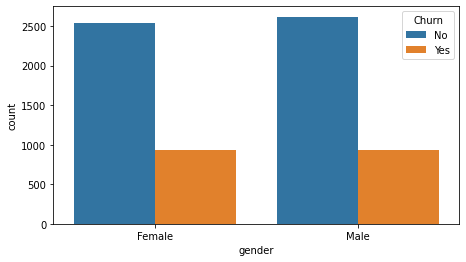

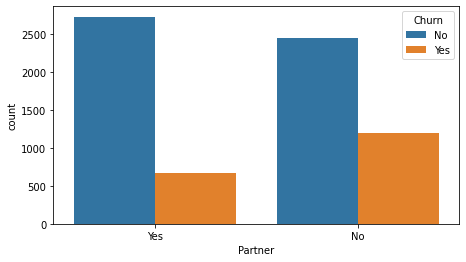

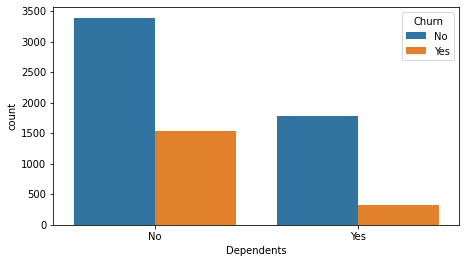

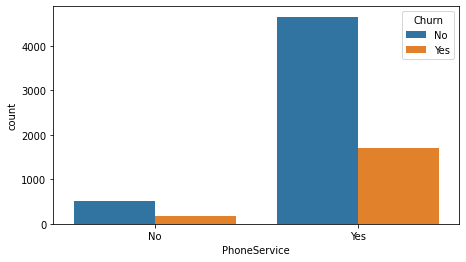

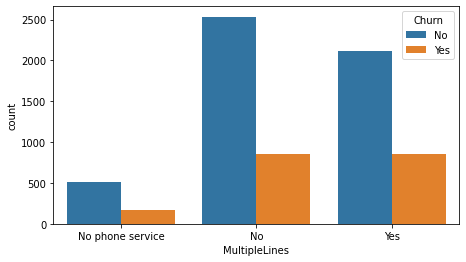

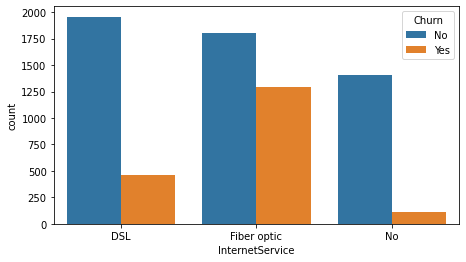

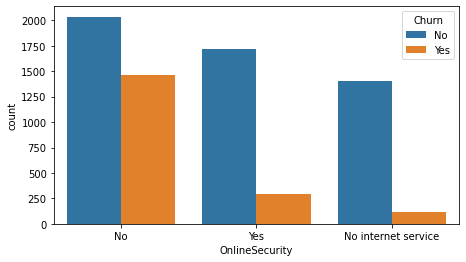

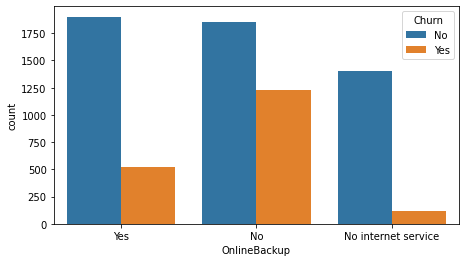

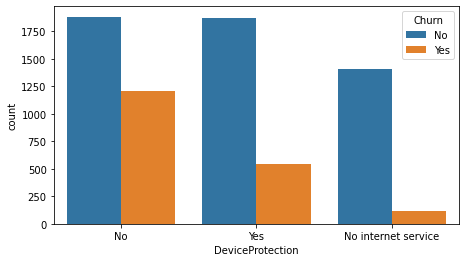

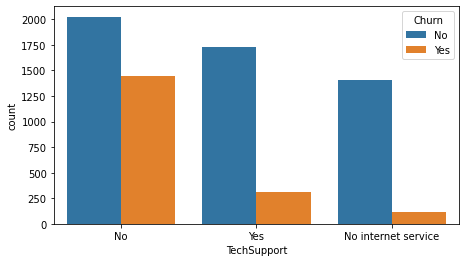

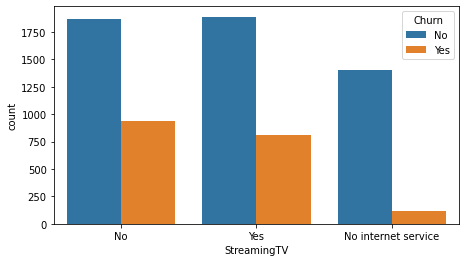

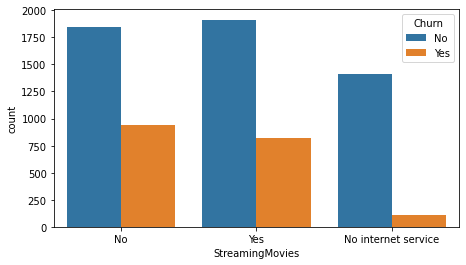

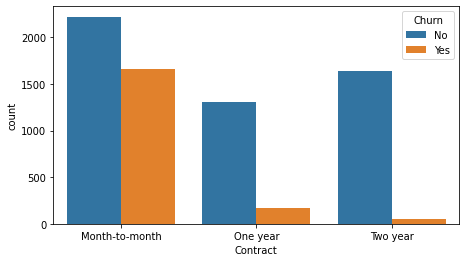

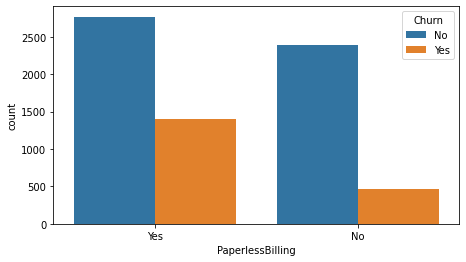

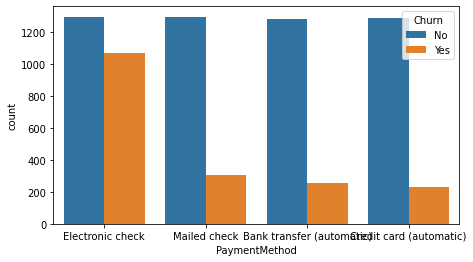

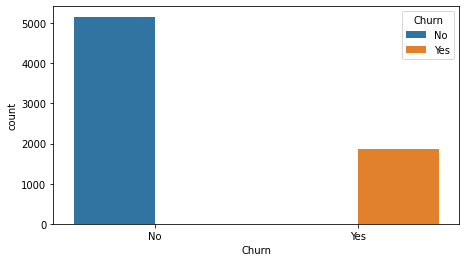

In [ ]:
for i in category:
  countplot(i)

We know the target is imbalance. We focused on why they're choosing yes because it was to small. We got that they're choosing 'Yes' depends on 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod'.

# v. Data Preprocessing

## Handling Outlier

In [15]:
# Make a definition of Histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

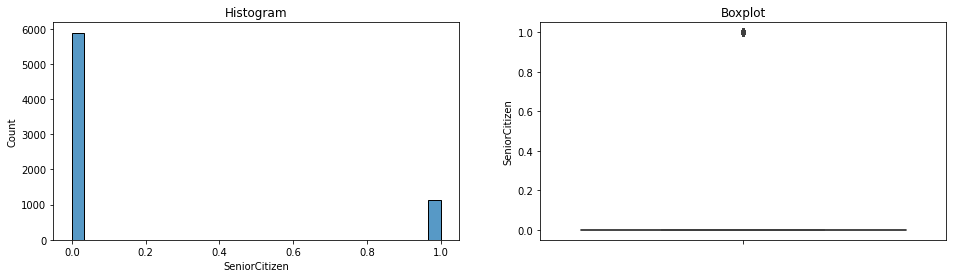


Skewness Value :  1.8311025436022044



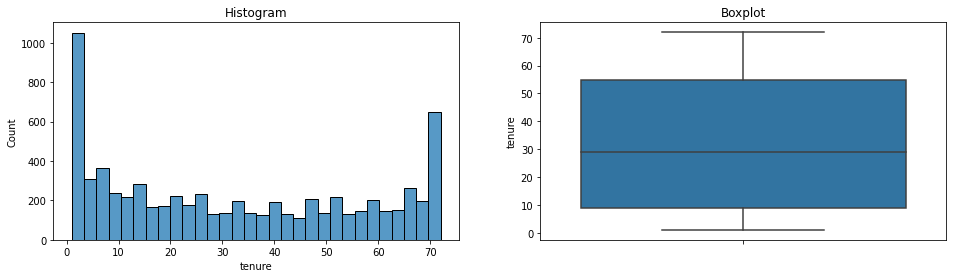


Skewness Value :  0.23773083190513133



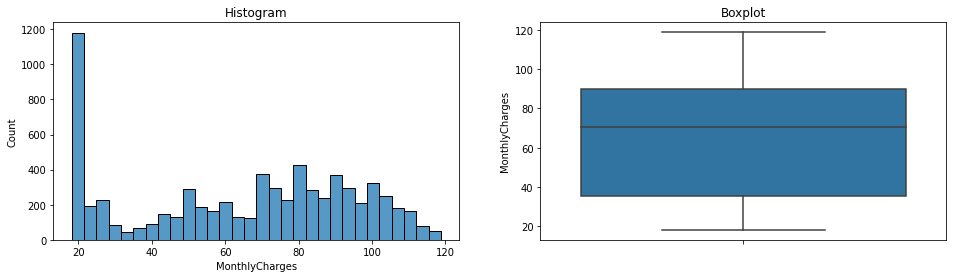


Skewness Value :  -0.22210292770166232



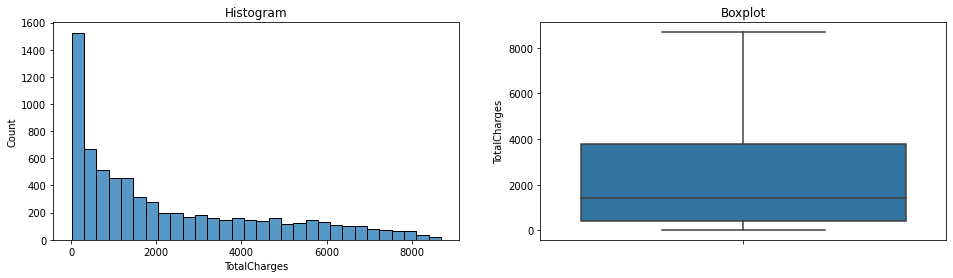


Skewness Value :  0.9616424997242504



In [ ]:
kolom = num.columns

for i in kolom:
    diagnostic_plots(data, i)
    print('\nSkewness Value : ', data[i].skew())
    print('')

There's no outlier on our numeric data

## Handling Missing Values


In [16]:
# Check missing value
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There's no missing values

In [17]:
# Drop the feature that doesn't need
df=data.drop(data.columns.difference(['Churn','Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure', 'MonthlyCharges', 'TotalCharges']), axis=1)
df.shape

(7032, 14)

In [18]:
target = df['Churn'].apply(lambda y_value: 1 if y_value =='Yes' else 0)
df=df.drop('Churn', axis=1)
df.shape

(7032, 13)

In [19]:
df['Churn'] = target

## Data Inference

In [20]:
# Make data inference
df_inf = df.sample(10, random_state=34)
df_inf

,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2519,No,2,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.45,171.45,0
1559,No,2,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,45.30,0
976,No,1,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1
4562,Yes,71,Yes,Fiber optic,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.60,8100.25,0
4224,No,71,Yes,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,1416.50,0
325,No,52,Yes,Fiber optic,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),102.70,5138.10,0
5049,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.20,20.20,1
6162,No,60,No,DSL,No,Yes,No,No,Two year,Yes,Credit card (automatic),49.45,2907.55,0
4296,Yes,35,Yes,DSL,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,72.25,2568.55,1
5405,Yes,34,Yes,Fiber optic,Yes,Yes,No,No,One year,Yes,Electronic check,103.80,3470.80,0


In [22]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)

In [23]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_train_test

,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,34,Yes,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,2,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7018,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,0
7019,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7020,No,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [24]:
# Split between train-set and test-set
X = df_train_test.drop('Churn', axis=1)
y = df_train_test['Churn']
X

,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,No,34,Yes,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50
2,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75
4,No,2,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Yes,24,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7018,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90
7019,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7020,No,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [37]:
# Split between train-set and test-set imbalance dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=34)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=34)
print('Train Size: ', X_train.shape)
print('Test Size: ',X_test.shape)

Train Size:  (3440, 13)
Test Size:  (2107, 13)


## Feature Scalling

In [52]:
num = X.select_dtypes(include=np.number).columns
cat = X.select_dtypes(include=['object']).columns

X_train_num= X_train[num]
X_train_cat= X_train[cat]

X_val_num= X_val[num]
X_val_cat= X_val[cat]

X_test_num= X_test[num]
X_test_cat= X_test[cat]

In [53]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)


X_train_num_scaled

array([[ 1.59556287,  1.51146273,  2.4145815 ],
       [ 1.55492874,  0.98830909,  1.93085096],
       [-0.43614359,  0.12251489, -0.33975335],
       ...,
       [-1.0050214 ,  0.3347849 , -0.78302793],
       [ 0.13273422,  1.06185146,  0.4889083 ],
       [-0.92375314, -0.83186443, -0.82056775]])

## Feature Encoding

In [54]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [55]:
df_onehot=X_train_cat.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
743,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1802,0,1,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
1377,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
802,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1595,1,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0


In [56]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_onehot.select_dtypes(include=np.number).columns.tolist()

In [57]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_val_cat_enc = encoder.transform(X_val_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc.shape

(3440, 28)

In [58]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc.toarray()], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc.toarray()], axis = 1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_enc.toarray()], axis = 1)
X_train_final.shape

(3440, 31)

In [59]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,tenure,MonthlyCharges,TotalCharges,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.595563,1.511463,2.414581,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.554929,0.988309,1.930851,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.436144,0.122515,-0.339753,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.595563,0.374899,1.363989,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.720582,-0.031256,-0.583251,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,1.311124,-0.188369,0.690513,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3436,0.579710,-1.371732,-0.511044,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3437,-1.005021,0.334785,-0.783028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3438,0.132734,1.061851,0.488908,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [60]:
num = X.select_dtypes(include=np.number).columns
cat = X.select_dtypes(include=['object']).columns

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num),
    ('pipe_cat', cat_pipeline, cat)
])

# vi. Model Definition

In [62]:
# Feature Extract
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [65]:
X_train.shape

(3440, 31)

In [66]:
set(y_train)

{0, 1}

## Make Pipeline Tensorflow

In [70]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# vii. Model Training

## Make NN Architecture

In [71]:
# Made the architecture functional api
data_in = Input(shape=(31,))
hidden_1 = Dense(17, activation='relu', kernel_initializer = 'GlorotUniform')(data_in)
hidden_2 = Dense(7, activation='relu', kernel_initializer = 'GlorotUniform')(hidden_1)
out = Dense(1, activation='sigmoid', kernel_initializer = 'GlorotUniform')(hidden_2)

model = Model(inputs=data_in, outputs=out)


In [72]:
# Made the architecture sequential API
model = Sequential()
model.add(Dense(17, activation='relu', kernel_initializer = 'GlorotUniform', input_shape=(31,))) # hidden layer 1
model.add(Dense(7, activation='relu', kernel_initializer = 'GlorotUniform')) # hidden layer 2
model.add(Dense(1, activation='sigmoid', kernel_initializer = 'GlorotUniform')) # output layer


# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history = model.fit(train_dataset, epochs=20, batch_size=7, validation_data=val_dataset)

Epoch 1/20
108/108 [==============================] - 1s 3ms/step - loss: 0.7048 - accuracy: 0.5355 - val_loss: 0.5525 - val_accuracy: 0.7322
Epoch 2/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7372 - val_loss: 0.4688 - val_accuracy: 0.7641
Epoch 3/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7863 - val_loss: 0.4550 - val_accuracy: 0.7810
Epoch 4/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8015 - val_loss: 0.4502 - val_accuracy: 0.7824
Epoch 5/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8020 - val_loss: 0.4473 - val_accuracy: 0.7817
Epoch 6/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8029 - val_loss: 0.4448 - val_accuracy: 0.7858
Epoch 7/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8052 - val_loss: 0.4429 - val_accuracy: 0.7837
Epoch 

# viii. Model Evaluation

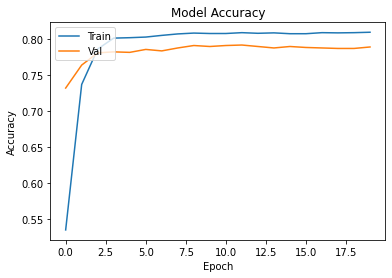

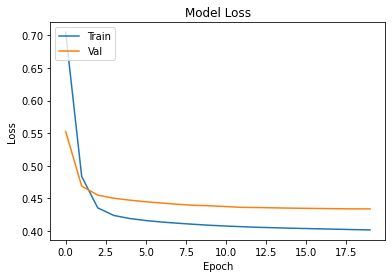

In [73]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

We got a better condition when epoch is about 10-13 because there's no overfitting so much in the model accuracy and in model loss looks good too, so we can use the model.

In [74]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1547
           1       0.63      0.56      0.59       560

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.79      2107



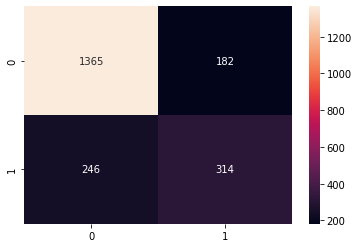

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")

We need the precision score are bigger than the recall score when the accuracy score is 0.80 it's good remembering this is imbalanced dataset.

# ix. Model Saving

In [94]:
# save model
model.save("nn_churn.h5")

with open("churn.pkl", "wb") as f:
  pickle.dump(data_pipeline, f)

In [91]:
# load model
from tensorflow.keras.models import load_model

model_churn = load_model("nn_churn.h5")

In [80]:
res_model = model_churn.predict(X_test)

In [81]:
model_churn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                544       
                                                                 
 dense_13 (Dense)            (None, 7)                 126       
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


# x. Model Inference

In [82]:
num_columns = X.select_dtypes(include=np.number).columns.tolist()
cat_columns = X.select_dtypes(include=['object']).columns.tolist()

In [83]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = df_inf[num_columns] 
data_inf_cat = df_inf[cat_columns]

In [84]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [85]:
num_columns = X.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_onehot.select_dtypes(include=np.number).columns.tolist()

In [86]:
# Merge the dataset

data_inf_final = np.concatenate((data_inf_num_scaled, data_inf_cat_enc.toarray()), axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns=num_columns + cat_columns)
data_inf_final_df

,tenure,MonthlyCharges,TotalCharges,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.248826,0.864624,-0.941500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.248826,-1.512131,-0.996406,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.289460,0.144243,-0.985699,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.554929,1.638490,2.509465,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.554929,-1.537203,-0.399599,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.782880,1.240693,1.220206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,-1.289460,-1.517146,-1.007331,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,1.107953,-0.539366,0.249372,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.092100,0.222800,0.101824,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.051466,1.277464,0.494523,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
# predict inference set
y_pred_inf = model.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['Predict'])
y_pred_inf_df

,Predict
0,0.802837
1,0.192645
2,0.793173
3,0.048091
4,0.005334
5,0.267979
6,0.242971
7,0.023047
8,0.103125
9,0.256677


In [88]:
y_pred_inf_df['Predict'] = (y_pred_inf_df['Predict'].apply(lambda y_value: 1 if y_value >= 0.5 else 0))
y_pred_inf_df

,Predict
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [89]:
# Concat Inference-Set with Prediction

pd.concat([df_inf, y_pred_inf_df], axis=1)

,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predict
0,No,2,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.45,171.45,0,1
1,No,2,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,45.30,0,0
2,No,1,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1,1
3,Yes,71,Yes,Fiber optic,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.60,8100.25,0,0
4,No,71,Yes,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,1416.50,0,0
5,No,52,Yes,Fiber optic,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),102.70,5138.10,0,0
6,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.20,20.20,1,0
7,No,60,No,DSL,No,Yes,No,No,Two year,Yes,Credit card (automatic),49.45,2907.55,0,0
8,Yes,35,Yes,DSL,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,72.25,2568.55,1,0
9,Yes,34,Yes,Fiber optic,Yes,Yes,No,No,One year,Yes,Electronic check,103.80,3470.80,0,0


From the 10 of predicting, we got 3 false predict, it's still good remember this is an imbalance dataset

# xi. Conclusion

Conclusion that we got from this project is do the trial and error so we can get the best paramater for the best result, start from eliminate the feature we dont need with feature selection, feature scalling, etc.\
The result we got from this poject:
- Do the Feature Engineering
- Eliminate 10 more feature 
- Do the trial and error for best result
- Used Neural Network tensorflow with arround 79% of accuracy
- Get the data prediction

